# Lab 7: Clustering in Scikit-Learn
**Data Science for Biologists** &#8226; University of Washington &#8226; BIOL 419/519 &#8226; Winter 2019

Course design and lecture material by [Bingni Brunton](https://github.com/bwbrunton) and [Kameron Harris](https://github.com/kharris/). Lab design and materials by [Eleanor Lutz](https://github.com/eleanorlutz/), with helpful comments and suggestions from Bing and Kam.

### Table of Contents
1. K-means clustering using scikit-learn
2. Bonus exercises

### Helpful resources
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
- [An introduction to machine learning with Scikit-Learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
- [Scikit-Learn user guide](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-Learn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116) by Python for Data Science

### Data
- The data in this lab was downloaded from [Kaggle](https://www.kaggle.com/uciml/iris) (originally from [Fisher 1936](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf)) and was edited for teaching purposes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind") # Use a colorblind friendly color scheme
%matplotlib inline

## Lab 7 Part 1: 

In previous labs, we created models that would either allow us to:

- predict one metric from another
- classify new data samples based on known categories in the training data

Both of these approaches were examples of supervised learning. We fit models using existing training data with the goal of predicting values for new test data.

Today, we want to see what patterns emerge from data when we apply the unsupervised learning technique of k-means clustering. This week's data consists of measurements taken from three species of irises.

**Exercise 1:** Read in the `iris.csv` dataset and display the first five rows.

In [2]:
df = pd.read_csv("./data/Lab_07/iris_data.csv")
display(df.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Exercise 2:** Create a scatterplot of sepal length vs petal width, with each species plotted as a different color.

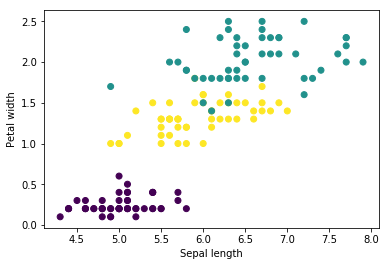

In [3]:
colors = {'Setosa':0, 'Virginica':1, 'Versicolor':2}

plt.scatter(df["sepal.length"], df["petal.width"], c=df['variety'].apply(lambda x: colors[x]))
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.show()

## K-means clustering with sci-kit learn

K-means clustering is an iterative clustering algorithm that is used to cluster unlabeled data. For example, the data you have may be unlabeled because it was collected by someone else who didn't have time to label everything by hand.

- **Initialization:** First, k-means randomly chooses ${k}$ samples from the data to use as the initial cluster centers (${k}$ is the number of clusters). 
- **Cluster Assignment:** Next, each data point is assigned to the cluster center that is closest to that data point. 
- **Move centroid:** At this point each cluster center should have a set of data points associated with that cluster assignment. We will now update the cluster center to be the mean of all of the data points assigned to that cluster. 
- **Iterate:** The previous step will likely move the cluster centers. If it did, we will repeat the process again and again until the centroids no longer move after the cluster assignment step.

Below is an animation showing the steps of K-means clustering for ${k = 4}$
<img src="https://cdn-images-1.medium.com/max/800/1*4LOxZL6bFl3rXlr2uCiKlQ.gif" />

*Credit:* Andrey A. Shabalin

To run the k-means algorithm in Scikit-learn, import `sklearn.cluster.KMeans`: 

In [4]:
from sklearn.cluster import KMeans

**Exercise 3:** First, split the dataframe into training and test data sets called `train_data` and `test_data`. Refer to the Lab 6 "Splitting data using Pandas" section for a fast way to separate data into training and test datasets.

In [5]:
train_data = df.sample(frac=0.7)
test_data = df.drop(train_data.index)

Since `KMeans` is an unsupervised learning algorithm, it does not use an answer dataset (like `LDA` from last week). We'll remove the species descriptions from both dataframes:

In [6]:
train_data_n = train_data.drop("variety", axis=1)
test_data_n = test_data.drop("variety", axis=1)

Now we can use k-means clustering to fit a cluster called `cluster` to your iris data matrix with $k=2$ clusters:

In [7]:
cluster = KMeans(n_clusters=2)
cluster.fit(train_data_n)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The documentation for [Scikit-learn K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) describes what can be done after fitting this model. For example, the attribute `labels_` returns an array of the cluster ID for every data point:

In [8]:
cluster.labels_ 

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

**Exercise 4:** Create a new column, `labels`, in the `train_data` iris data frame using the labels from the k-means model. Display the first five rows of the dataframe. Plot sepal length by petal width from this dataframe with points colored by the k-means cluster labels.

,sepal.length,sepal.width,petal.length,petal.width,variety,labels
85,6.0,3.4,4.5,1.6,Versicolor,0
32,5.2,4.1,1.5,0.1,Setosa,1
84,5.4,3.0,4.5,1.5,Versicolor,0
7,5.0,3.4,1.5,0.2,Setosa,1
35,5.0,3.2,1.2,0.2,Setosa,1


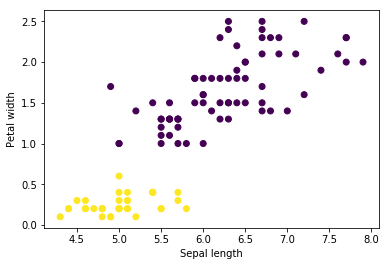

In [9]:
train_data["labels"] = cluster.labels_
display(train_data.head())

plt.scatter(train_data["sepal.length"], train_data["petal.width"], c=train_data['labels'])
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.show()

Another helpful Scikit-learn method is `predict`, which uses the previously created clustering algorithm to predict the closest cluster for the given data. We can use this to predict the cluster for a previously unseen data point, or to look at different data points within the training data:

In [10]:
cluster.predict(test_data_n)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Now we can compare the predicted cluster IDs to the known species names for each sample to see how well the machine learning algorithm matches the species classification.

In [11]:
test_data['label'] = cluster.predict(test_data_n)
test_data.groupby(['variety','label']).size().reset_index(name='counts')

,variety,label,counts
0,Setosa,1,15
1,Versicolor,0,11
2,Versicolor,1,1
3,Virginica,0,18


**Exercise 5:** Cluster your iris data again using $k=3$ clusters. Display the first five rows of the training dataset. After clustering, replace your original cluster labels in `train_data` with the new labels and plot sepal length by petal width (scatterpoints colored by cluster label). 

,sepal.length,sepal.width,petal.length,petal.width
85,6.0,3.4,4.5,1.6
32,5.2,4.1,1.5,0.1
84,5.4,3.0,4.5,1.5
7,5.0,3.4,1.5,0.2
35,5.0,3.2,1.2,0.2


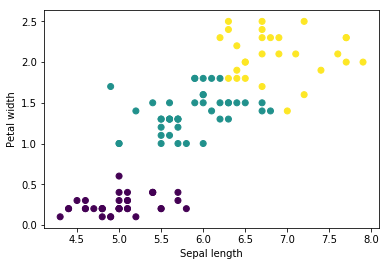

In [12]:
display(train_data_n.head())

cluster_5 = KMeans(n_clusters=3)
cluster_5.fit(train_data_n)

train_data["labels"] = cluster_5.labels_

plt.scatter(train_data["sepal.length"], train_data["petal.width"], c=train_data['labels'])
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.show()

**Exercise 6:** Use this new cluster to predict the cluster ID of the test data. Display the number of samples that belong to each cluster-species group. Does it seem like there is one species that clusters better than the others? 

In [13]:
test_data['label'] = cluster_5.predict(test_data_n)
test_data.groupby(['variety','label']).size().reset_index(name='counts')

,variety,label,counts
0,Setosa,0,15
1,Versicolor,1,11
2,Versicolor,2,1
3,Virginica,1,8
4,Virginica,2,10


**Exercise 7:** Cluster only the `sepal.length` and `petal.width` of the iris data matrix into $k=3$ clusters. Display the first five rows of the training dataset. Repeat the plot above. How do the results change with fewer dimensions for the model?

,sepal.length,petal.width
85,6.0,1.6
32,5.2,0.1
84,5.4,1.5
7,5.0,0.2
35,5.0,0.2


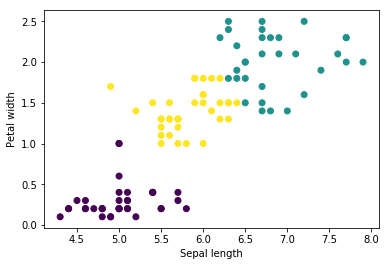

In [14]:
train_data_n2 = train_data.drop(["sepal.width", "petal.length", "variety", "labels"], axis=1)
display(train_data_n2.head())

cluster_6 = KMeans(n_clusters=3)
cluster_6.fit(train_data_n2)

train_data["labels"] = cluster_6.labels_

plt.scatter(train_data["sepal.length"], train_data["petal.width"], c=train_data['labels'])
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.show()

## Lab 7 Bonus exercise

**Bonus Exercise 1:** Visualize the success of the clustering algorithm compared to the true species values. Plot the sepal length, petal width, and petal length in a 3D plot. Each scatterpoint should be colored according to species, and the clustering results should be represented by different marker shapes (circle, X, diamond, etc). *Hint:* Lab 4 includes code for plotting a 3D plot in Bonus Exercise 2. 

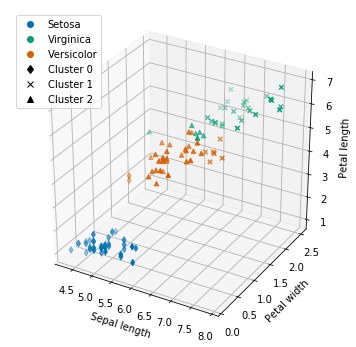

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# See Lab 4 Answer Key for how to plot in 3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

groups = train_data.groupby("labels")
colors = {'Setosa':"C0", 'Virginica':"C1", 'Versicolor':"C2"}
scatters = ["d", "x", "^"]

for cluster, group in groups: 
    scatter = scatters[cluster]
    ax.scatter(group["sepal.length"], group["petal.width"], group["petal.length"],
               c=group["variety"].apply(lambda x: colors[x]), marker=scatter)

ax.set_xlabel("Sepal length")
ax.set_ylabel("Petal width")
ax.set_zlabel("Petal length")

# Create a custom legend
legend = [matplotlib.lines.Line2D([0], [0], color='C0', marker='o', lw=0, 
                                  label='Setosa'),
          matplotlib.lines.Line2D([0], [0], color='C1', marker='o', lw=0, 
                                  label='Virginica'),
          matplotlib.lines.Line2D([0], [0], color='C2', marker='o', lw=0, 
                                  label='Versicolor'),
          matplotlib.lines.Line2D([0], [0], color='k', marker=scatters[0], lw=0, 
                                  label='Cluster 0'),
          matplotlib.lines.Line2D([0], [0], color='k', marker=scatters[1], lw=0, 
                                  label='Cluster 1'),
          matplotlib.lines.Line2D([0], [0], color='k', marker=scatters[2], lw=0, 
                                  label='Cluster 2'),]
ax.legend(handles=legend)

plt.show()